In [1]:
import pandas as pd


In [2]:
df_SeoulFloating = pd.read_csv('dss/SeoulFloating.csv')
df_Policy = pd.read_csv('dss/Policy.csv')
df_PatientInfo = pd.read_csv('dss/PatientInfo.csv')
df_Region = pd.read_csv('dss/Region.csv')
df_SearchTrend = pd.read_csv('dss/SearchTrend.csv')
df_Time = pd.read_csv('dss/Time.csv')
df_TimeAge = pd.read_csv('dss/TimeAge.csv')
df_TimeGender = pd.read_csv('dss/TimeGender.csv')
df_TimeProvince = pd.read_csv('dss/TimeProvince.csv')
df_Weather = pd.read_csv('dss/Weather.csv')
df_Case = pd.read_csv('dss/Case.csv')
df_PatientRoute = pd.read_csv('dss/PatientRoute.csv')

In [3]:
df_SearchTrend

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...,...
1566,2020-04-15,0.21744,0.03918,0.09008,4.97503
1567,2020-04-16,0.15463,0.04427,0.11190,5.45701
1568,2020-04-17,0.16563,0.04608,0.11026,4.74840
1569,2020-04-18,0.17654,0.02872,0.07627,4.22987


In [4]:
import matplotlib.pyplot as plt

In [5]:
df_Time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
87,2020-04-16,0,538775,513894,10613,7757,229
88,2020-04-17,0,546463,521642,10635,7829,230
89,2020-04-18,0,554834,530631,10653,7937,232
90,2020-04-19,0,559109,536205,10661,8042,234


In [6]:
df_TimeAge

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
445,2020-04-20,0,40s,1412,3
446,2020-04-20,0,50s,1948,15
447,2020-04-20,0,60s,1343,34
448,2020-04-20,0,70s,705,69


In [7]:
df_TimeGender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
95,2020-04-18,0,female,6360,108
96,2020-04-19,0,male,4297,124
97,2020-04-19,0,female,6364,110
98,2020-04-20,0,male,4302,125


In [8]:
df_TimeProvince

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
1559,2020-04-20,0,Jeollabuk-do,17,9,0
1560,2020-04-20,0,Jeollanam-do,15,8,0
1561,2020-04-20,0,Gyeongsangbuk-do,1361,1064,51
1562,2020-04-20,0,Gyeongsangnam-do,116,87,0


In [9]:
df_Weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
25130,50000,Jeollabuk-do,2020-04-19,11.2,8.0,16.1,15.5,2.5,20.0,85.3
25131,51000,Jeollanam-do,2020-04-19,12.0,10.6,13.4,29.1,8.5,90.0,88.4
25132,60000,Gyeongsangbuk-do,2020-04-19,10.2,5.5,15.0,27.4,5.0,70.0,90.8
25133,61000,Gyeongsangnam-do,2020-04-19,11.1,9.6,14.2,30.0,4.5,70.0,82.3


In [10]:
df_PatientRoute

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...
5958,6100000090,NaN,2020-03-24,Seoul,Gangseo-gu,airport,37.558654,126.794474
5959,6100000090,NaN,2020-03-24,Busan,Gangseo-gu,airport,35.173220,128.946459
5960,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
5961,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003


In [11]:
patient_df = pd.merge(df_PatientInfo,df_PatientRoute)

In [12]:
patient_df # 환자루트와 환자정보 merge

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,date,type,latitude,longitude
0,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,31.0,NaN,2020-01-30,2020-03-02,NaN,released,2020-01-28,store,37.588923,127.076681
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,31.0,NaN,2020-01-30,2020-03-02,NaN,released,2020-01-28,restaurant,37.589035,127.091943
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,31.0,NaN,2020-01-30,2020-03-02,NaN,released,2020-01-29,hospital,37.606560,127.092652
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,31.0,NaN,2020-01-30,2020-03-02,NaN,released,2020-01-30,hospital,37.612772,127.098167
4,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,17.0,NaN,2020-01-30,2020-02-19,NaN,released,2020-01-26,church,37.586288,126.999716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,NaN,2020-03-22,2020-03-23,NaN,NaN,isolated,2020-03-21,etc,35.333368,128.497988
3543,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,NaN,2020-03-22,2020-03-23,NaN,NaN,isolated,2020-03-22,hospital,35.275725,128.410312
3544,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,NaN,2020-03-25,2020-03-26,NaN,NaN,isolated,2020-03-25,store,35.336944,129.026389
3545,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,NaN,2020-03-25,2020-03-26,NaN,NaN,isolated,2020-03-25,hospital,35.335757,129.025003


In [13]:
import missingno

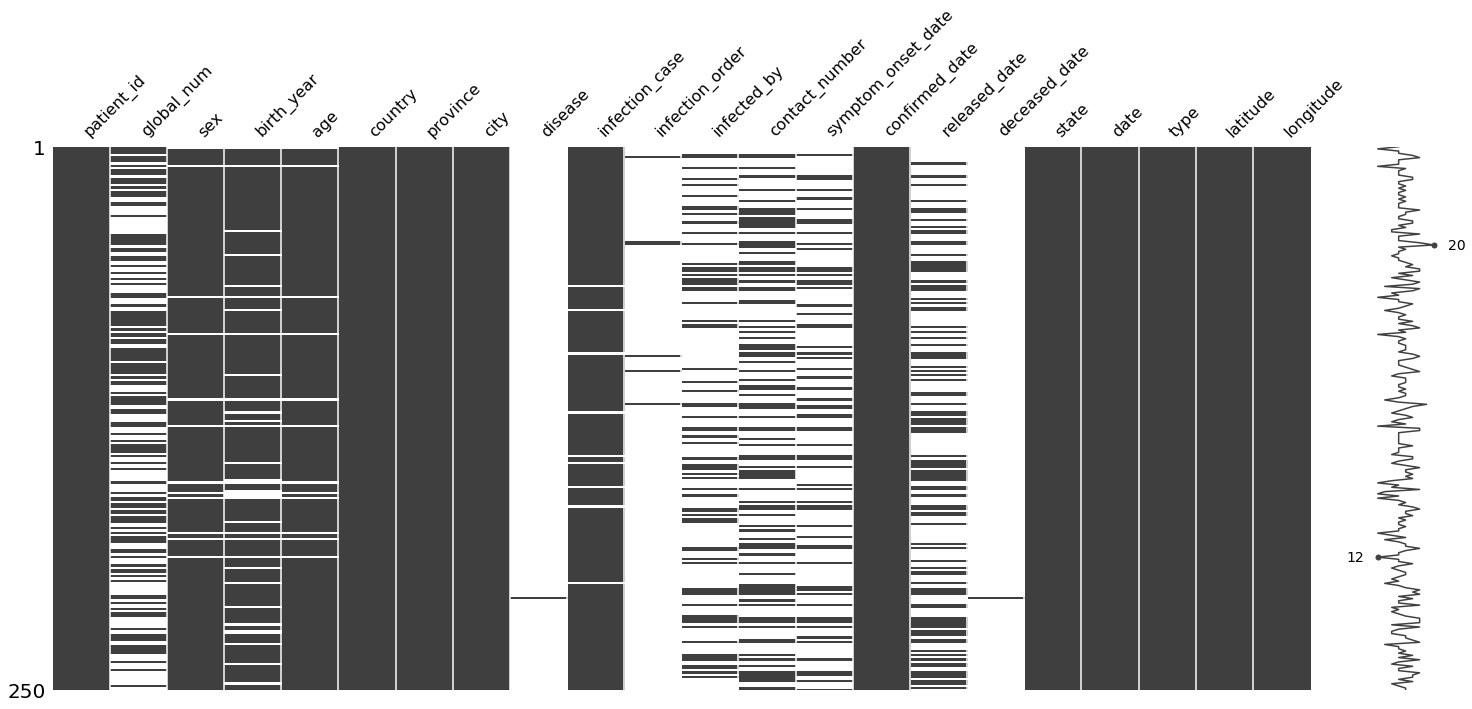

In [14]:
import missingno as msno
msno.matrix(patient_df.sample(250))

In [15]:
############### 시작

In [16]:
# 패키지 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
# 환자정보
df_PatientInfo.tail(5)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3325,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [18]:
# df_PatientInfo 의 컬럼 정보
df_PatientInfo.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

In [19]:
# 데이터 결측치 확인

df_PatientInfo.isnull().sum()

patient_id               0
global_num            1089
sex                     66
birth_year             437
age                     74
country                  0
province                 0
city                    79
disease               3308
infection_case         767
infection_order       3295
infected_by           2520
contact_number        2712
symptom_onset_date    2855
confirmed_date           3
released_date         2108
deceased_date         3266
state                    0
dtype: int64

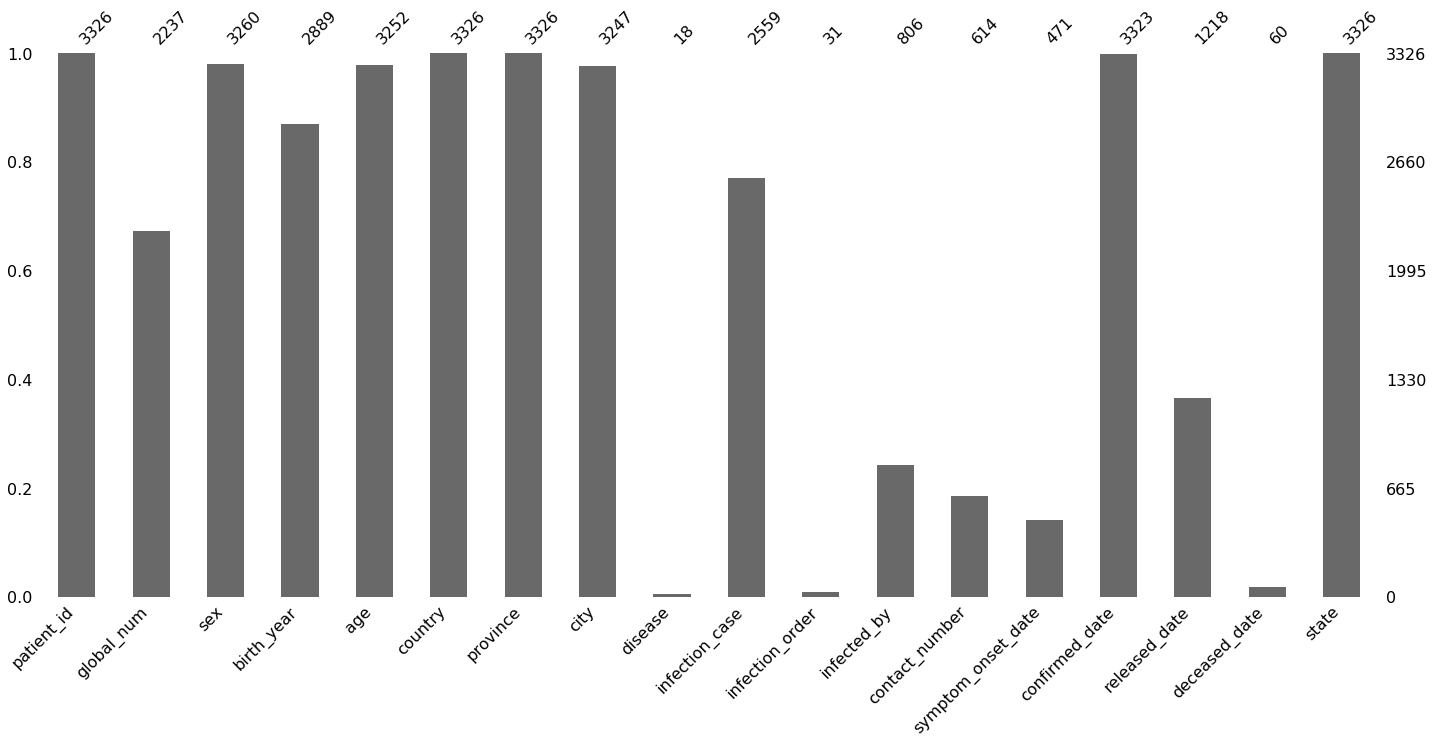

In [20]:
msno.bar(df_PatientInfo)

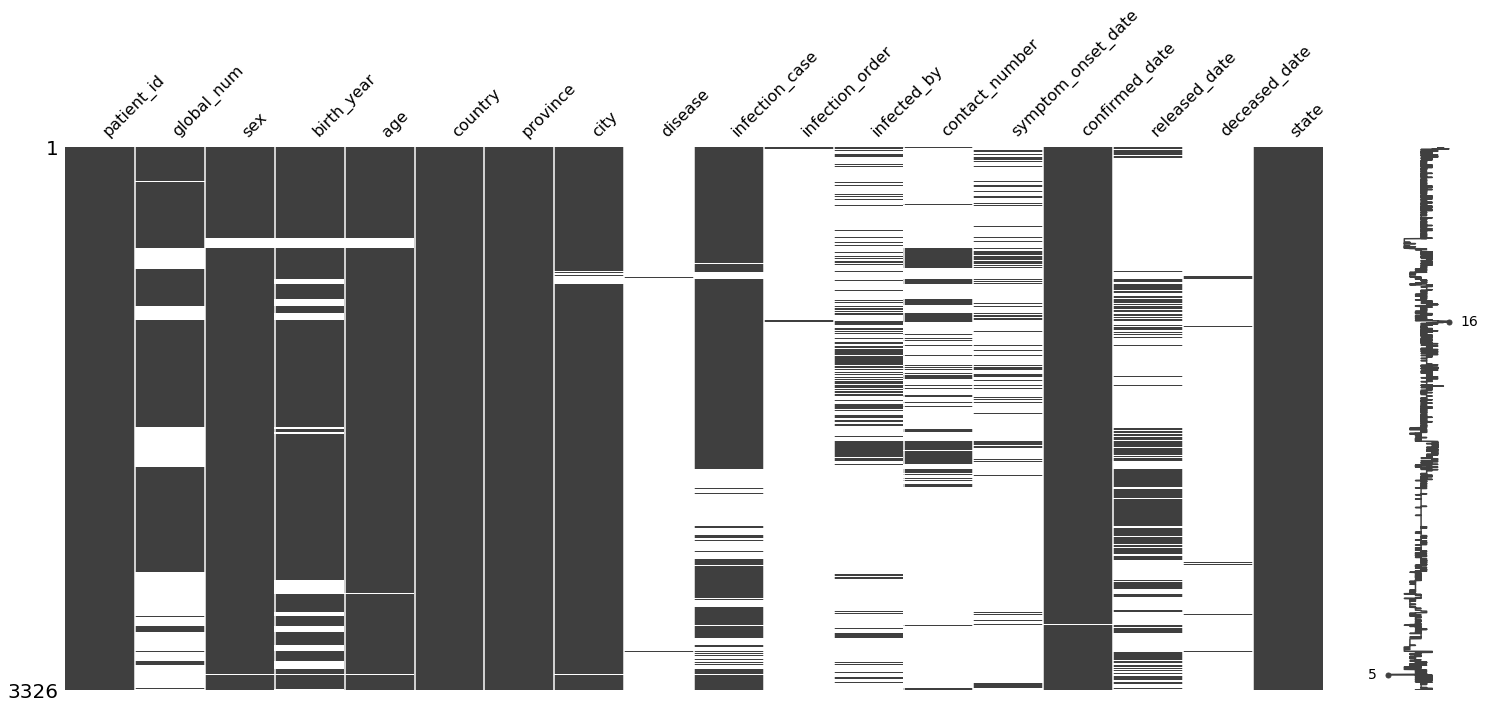

In [21]:
msno.matrix(df_PatientInfo)

In [22]:
# 데이터 타입 확인

df_PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 18 columns):
patient_id            3326 non-null int64
global_num            2237 non-null float64
sex                   3260 non-null object
birth_year            2889 non-null float64
age                   3252 non-null object
country               3326 non-null object
province              3326 non-null object
city                  3247 non-null object
disease               18 non-null object
infection_case        2559 non-null object
infection_order       31 non-null float64
infected_by           806 non-null float64
contact_number        614 non-null float64
symptom_onset_date    471 non-null object
confirmed_date        3323 non-null object
released_date         1218 non-null object
deceased_date         60 non-null object
state                 3326 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 467.8+ KB


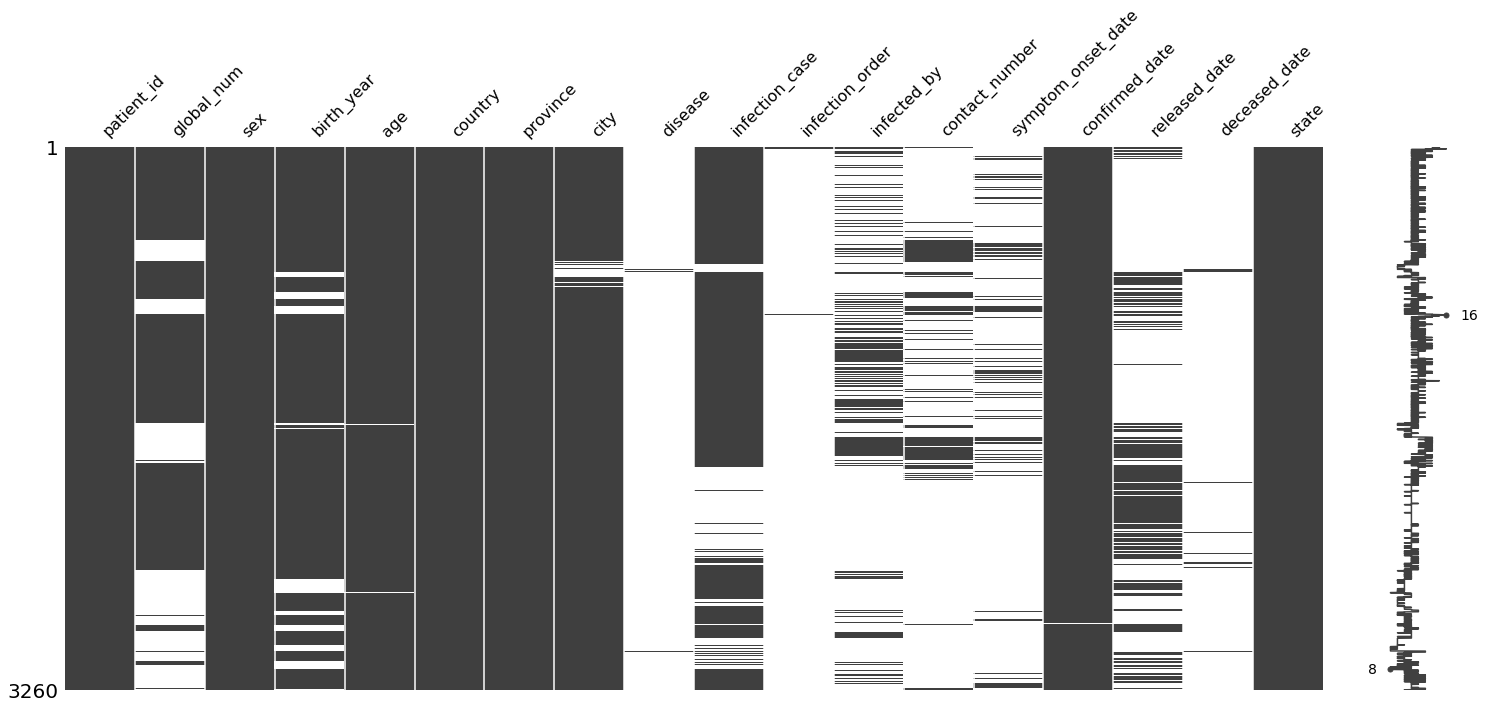

In [23]:
#성별이 누락된 데이터를 지우겠습니다.
df_PatientInfo.dropna(subset=['sex'], inplace=True)
msno.matrix(df_PatientInfo)

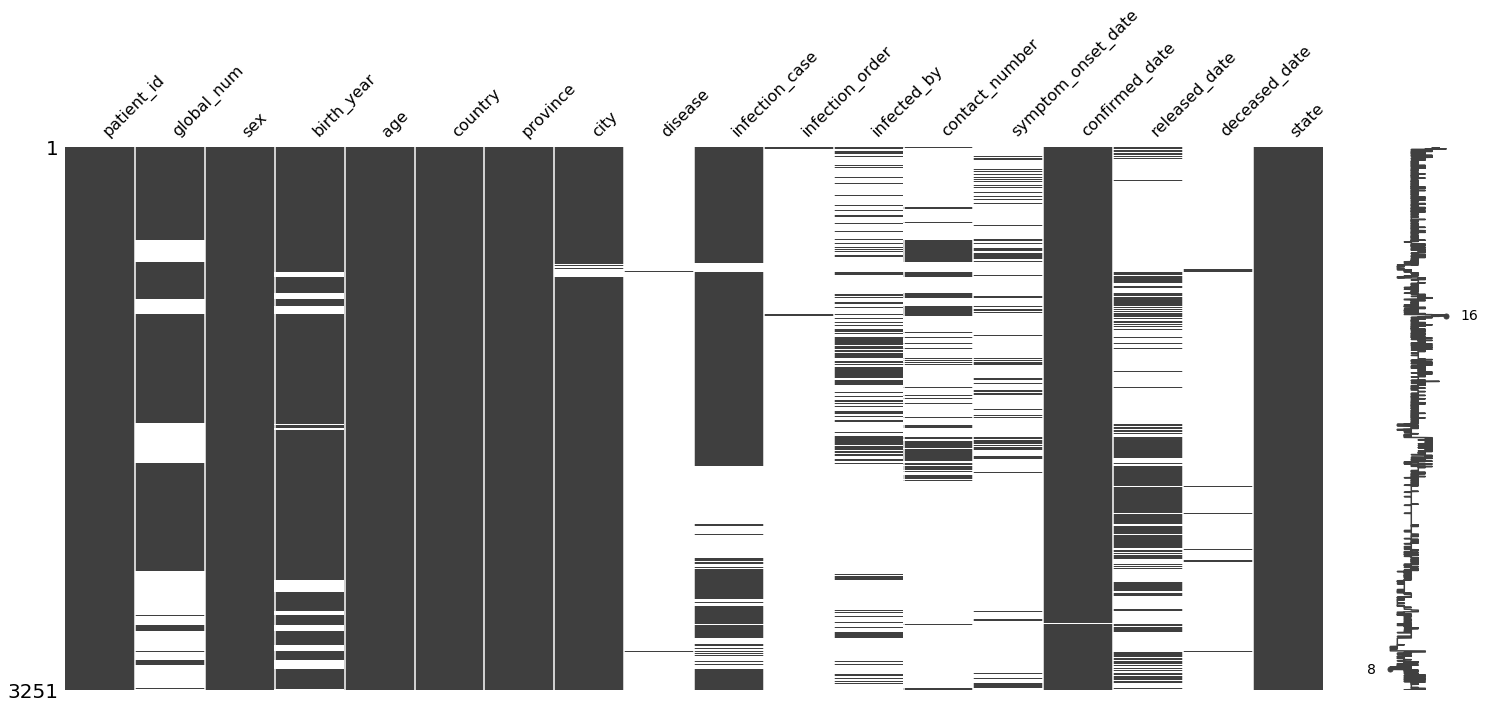

In [24]:
# 나이가 누락된 데이터도 지우도록 하겠습니다
df_PatientInfo.dropna(subset=['age'], inplace=True)
msno.matrix(df_PatientInfo)

In [25]:
# 3326개의 로우데이터에서 3251개로 감소하였습니다.

In [26]:
(df_PatientInfo['sex']=='male').value_counts()

False    1826
True     1425
Name: sex, dtype: int64

In [27]:
# 전체 인원수에서 성별로 나누기
women_patientinfo = (df_PatientInfo['sex'] == 'male').value_counts()[
                     0]/df_PatientInfo['sex'].count()*100
man_patientinfo = (df_PatientInfo['sex'] == 'male').value_counts()[
                   1]/df_PatientInfo['sex'].count()*100
# 소수점 첫째자리까지만 반올림
women_patientinfo= round(women_patientinfo,1)
man_patientinfo = round(man_patientinfo,1)

전체 감염자 3250명중 남성의 비율은 56.2%, 여성의 비율은 43.8% 입니다.


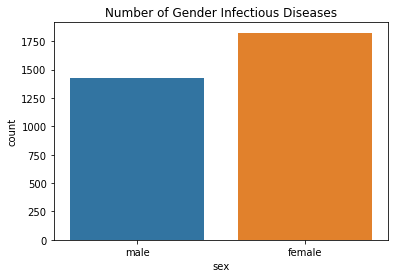

In [86]:


sns.countplot(data=df_PatientInfo, x='sex')
plt.title('Number of Gender Infectious Diseases')
print('전체 감염자 {}명중 남성의 비율은 {}%, 여성의 비율은 {}% 입니다.'.format(df_PatientInfo['sex'].count(),
                                                         women_patientinfo, man_patientinfo))

([<matplotlib.patches.Wedge at 0x27501f31288>,
 [Text(-0.21290453772296314, 1.079199544948464, ''),
  Text(0.2129046387649159, -1.0791995250148978, '')])

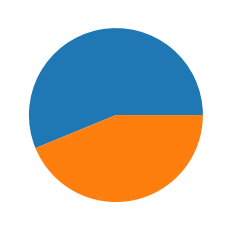

In [88]:
plt.pie([women_patientinfo,man_patientinfo])

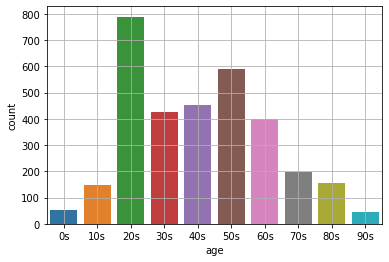

In [91]:
sns.countplot(x="age", data=df_PatientInfo.sort_values(by=['age']))
plt.grid(True)
# 100세 데이터 무엇? 삭제하겠습니다

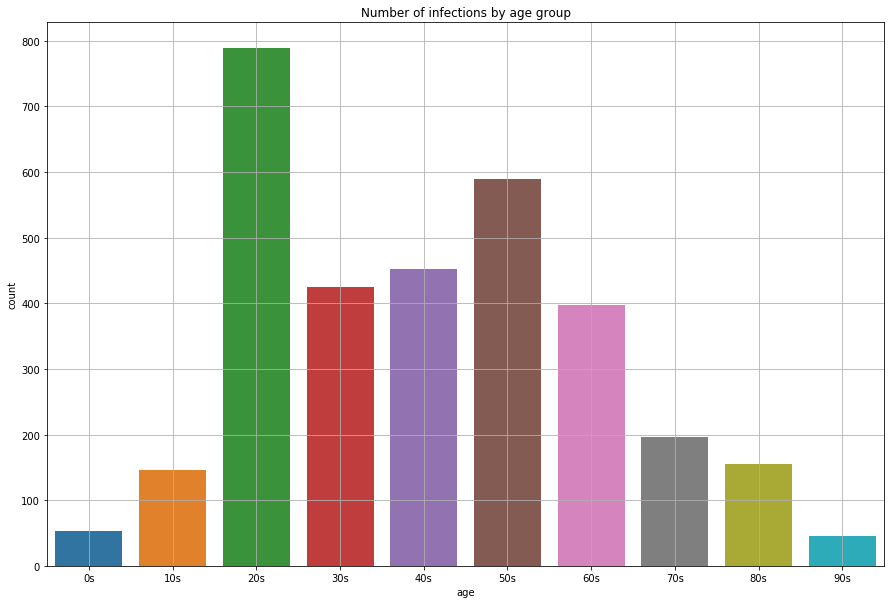

In [97]:
df_PatientInfo = df_PatientInfo.drop(df_PatientInfo[df_PatientInfo['age']=='100s'].index)
plt.figure(figsize=(15,10))
sns.countplot(x="age", data=df_PatientInfo.sort_values(by=['age']))
plt.title('Number of infections by age group')
plt.grid(True)


In [1]:
print("good work")

good work
